<a href="https://colab.research.google.com/github/rohitingole17792/AI-based-Content-Detection-and-Text-Detection-/blob/main/Car_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [72]:
df=pd.read_csv('/content/car data.csv')

In [73]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [74]:
df.shape

(301, 9)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [76]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [77]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [78]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [79]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [80]:
X=df.drop(['Car_Name','Selling_Price'],axis=1)
Y=df['Selling_Price']

In [81]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [82]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Data

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y , test_size=0.1, random_state=2)

Linear Regression Model

In [84]:
lin_reg_model=LinearRegression()

In [85]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [86]:
#predict of linear data
train_data_pred=lin_reg_model.predict(X_train)

In [87]:
error_score=metrics.r2_score(Y_train,train_data_pred)

In [88]:
print(error_score)

0.8799451660493711


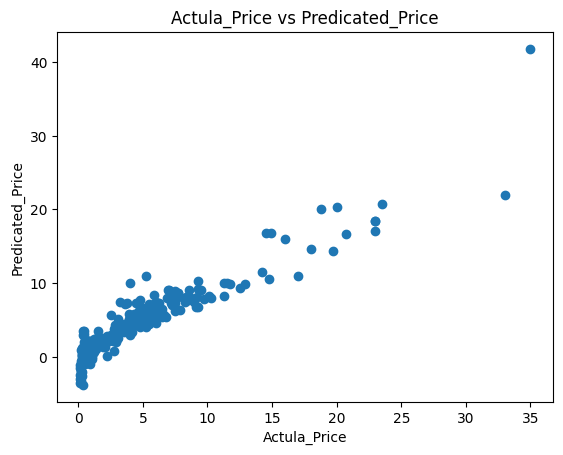

In [89]:
plt.scatter(Y_train,train_data_pred)
plt.xlabel('Actula_Price')
plt.ylabel('Predicated_Price')
plt.title('Actula_Price vs Predicated_Price')
plt.show()


In [90]:
#predict of linear data
train_data_pred=lin_reg_model.predict(X_test)

In [91]:
error_score=metrics.r2_score(Y_test,train_data_pred)

In [92]:
print(error_score)

0.8365766715027051


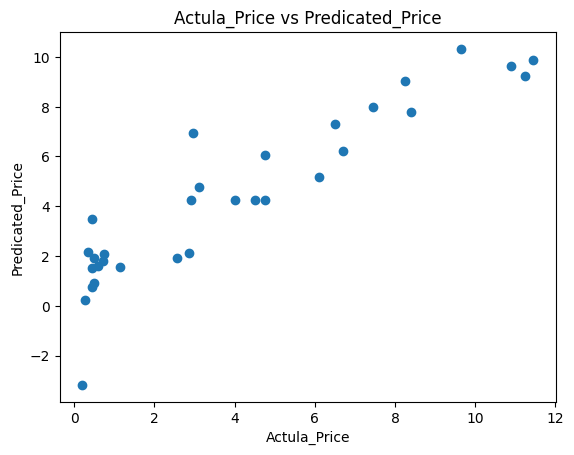

In [93]:
plt.scatter(Y_test,train_data_pred)
plt.xlabel('Actula_Price')
plt.ylabel('Predicated_Price')
plt.title('Actula_Price vs Predicated_Price')
plt.show()

#Lasso Regressions

In [94]:
lass_reg_model=Lasso()

In [95]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [96]:
#predict of linear data
train_data_pred=lass_reg_model.predict(X_train)

In [97]:
error_score=metrics.r2_score(Y_train,train_data_pred)

In [98]:
print(error_score)

0.8427856123435794


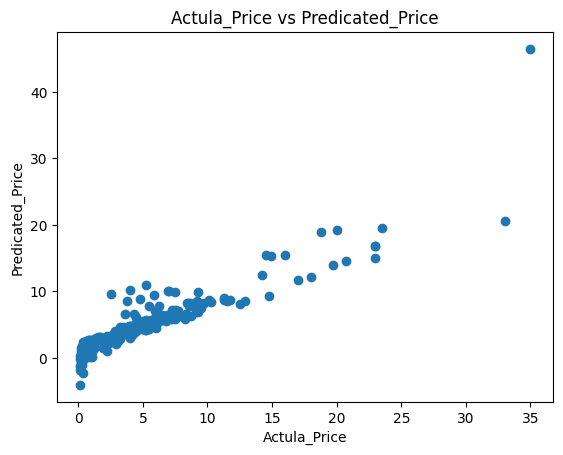

In [99]:
plt.scatter(Y_train,train_data_pred)
plt.xlabel('Actula_Price')
plt.ylabel('Predicated_Price')
plt.title('Actula_Price vs Predicated_Price')
plt.show()


In [100]:
#predict of Lasso data
train_data_pred=lass_reg_model.predict(X_test)

In [101]:
error_score=metrics.r2_score(Y_test,train_data_pred)

In [102]:
print(error_score)

0.8709167941173195


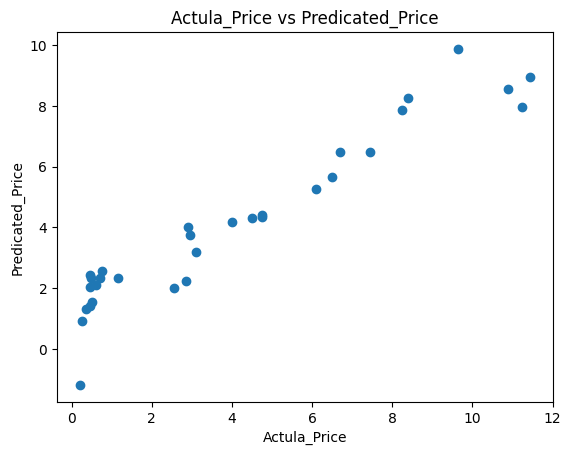

In [103]:
plt.scatter(Y_test,train_data_pred)
plt.xlabel('Actula_Price')
plt.ylabel('Predicated_Price')
plt.title('Actula_Price vs Predicated_Price')
plt.show()